# Underfitting Model
The model is too simple and describes the data not accurately enough.

In this case, we can see from the learning curves that the model is indeed underfitting. Both the training and validation accuracy curves plateau at a low value, indicating that the model is not learning the patterns in the data well enough.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


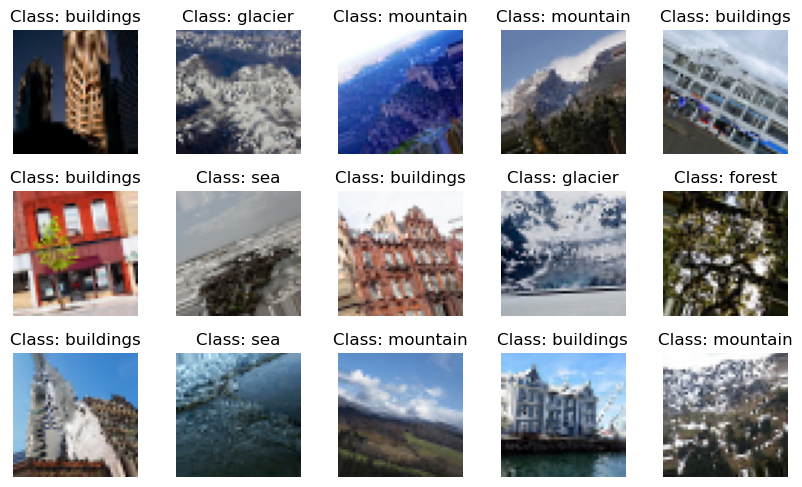

In [5]:
%run rueegg_wissiak_data_augmentation.ipynb

## Building the Model

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(16, (3,3), input_shape= (img_size,img_size,3), activation = 'relu', padding = 'same')) #padding = same size output
model.add(MaxPooling2D())

model.add(Conv2D(8, (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(8, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(6, activation = 'softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 50, 50, 16)        448       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 25, 25, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 25, 25, 8)         1160      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 12, 12, 8)        0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 1152)              0         
                                                                 
 dense_12 (Dense)            (None, 8)                

## Training the Model
Relatively high number of epochs is used to visualize the plateau-effect sufficiently.

In [30]:
history = model.fit(train_generator, validation_data=test_generator, epochs=8)

Epoch 1/8
439/439 [==============================] - 18s 39ms/step - loss: 1.4778 - accuracy: 0.3640 - val_loss: 1.1633 - val_accuracy: 0.5533
Epoch 2/8
439/439 [==============================] - 16s 37ms/step - loss: 1.2899 - accuracy: 0.4458 - val_loss: 1.0991 - val_accuracy: 0.5710
Epoch 3/8
439/439 [==============================] - 19s 42ms/step - loss: 1.2355 - accuracy: 0.4658 - val_loss: 1.0433 - val_accuracy: 0.6107
Epoch 4/8
439/439 [==============================] - 19s 43ms/step - loss: 1.2138 - accuracy: 0.4834 - val_loss: 1.1476 - val_accuracy: 0.5497
Epoch 5/8
439/439 [==============================] - 18s 41ms/step - loss: 1.2015 - accuracy: 0.4882 - val_loss: 0.9619 - val_accuracy: 0.6327
Epoch 6/8
439/439 [==============================] - 16s 36ms/step - loss: 1.1883 - accuracy: 0.4955 - val_loss: 0.9810 - val_accuracy: 0.6400
Epoch 7/8
439/439 [==============================] - 16s 36ms/step - loss: 1.1737 - accuracy: 0.4974 - val_loss: 0.9887 - val_accuracy: 0.6167

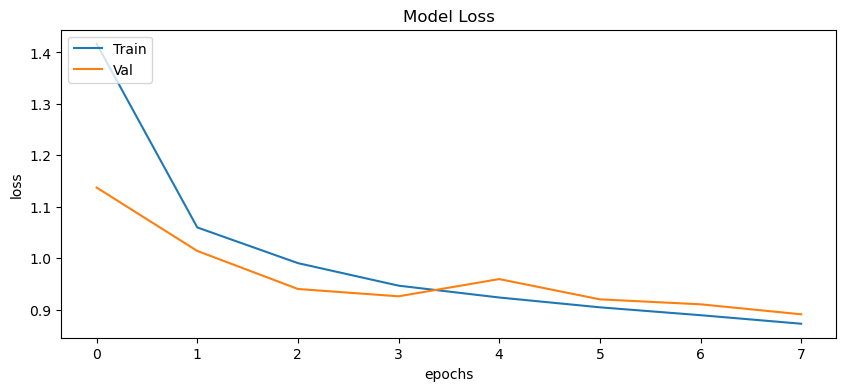

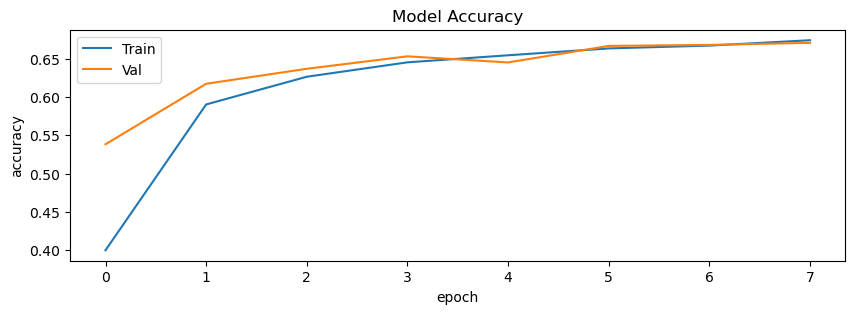

In [26]:
%run rueegg_wissiak_model_visualization.ipynb

In [31]:
%run rueegg_wissiak_model_evaluation.ipynb

94/94 [==============================] - 1s 15ms/step
Predicted classes: [0 5 0 ... 3 5 1]
True labels: [0 0 0 ... 5 5 5]
Accuracy:
 0.666
